

# Project: Investigate a Dataset ( Database_TMDb_movie_data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A Kaggle dataset consisting This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.

### Questions:

  *  Which genres are most popular from year to year ?
  *  Which Genre Has The Highest Release Of Movies ?
  *  Which movie has the highest profit ?
  * Which movie genre has the highest Budget ?
  * Is a Movie's rating gets Higher with less runtime ?
  * Which year has the highest release of movies?
  * Most Frequent Actor ?
  * Top 10 Production Companies With Higher Number Of Release ?
  * movie Rating dependency on profit?
  * What kinds of properties are associated with movies that have high revenues ?
  

Import needed libraries and load your Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df_tmbd = pd.read_csv("tmdb-movies.csv")
df_tmbd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_tmbd.shape

(10866, 21)

In [4]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Check null values

In [5]:
df_tmbd.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

check duplicates

In [6]:
df_tmbd.duplicated().sum()

1

get summary statistics of data

In [7]:
df_tmbd.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- we notice that `release_date` is string so we need to fix the data type to date
- There are some irrelevent columns & many missing values (Null)
- one duplicate value need to be droped.
- some Movie `budget` is zero which will only cause disturbance to the data as the are irrelevant

#### Data Cleaning

* drop unwanted columns

In [8]:
 
df_tmbd.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'],axis=1 ,inplace=True)
df_tmbd.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


 Drop duplicates

In [9]:
df_tmbd.drop_duplicates(inplace=True)

Now lets check how many Movies with Zero Budget & revenues 
* 4071 Movie

In [10]:
df_nobud = df_tmbd.query('budget == 0 & revenue == 0')
print(df_nobud.shape)

(4701, 14)


check rows with runtime zero 
* 31 row
as they are small we can drop them

In [11]:
df_run = df_tmbd.query('runtime == 0')
print(df_run.shape)
df_tmbd.drop(df_run.index,inplace=True)

(31, 14)


In [12]:
df_tmbd.shape

(10834, 14)

fixing `release_date` data type from str to datetime

In [13]:
df_tmbd['release_date'] = pd.to_datetime(df_tmbd['release_date'], infer_datetime_format=True)

 Drop null values 

In [14]:

df_tmbd.dropna(inplace=True)
df_tmbd.shape

(9759, 14)

In [15]:
df_tmbd.shape

(9759, 14)

data contains 14 rows & 9759 columns with considiration to movies with zero budget

make a function to copy movies data and split the column  into rows for Questions

In [16]:

def col_split(x):
    df = df_tmbd.copy()   # make cpoy of data 


    col = df[x].str.split('|')  

  # put into series to avoid getting nan values
    col_series = col.apply(pd.Series, 1)
    col_series_clean = col_series.stack()
    col_series_clean.index = col_series_clean.index.droplevel(-1)
    coldf = pd.DataFrame(col_series_clean)

# Delete the `Ticket` column from your DataFrame
    del df[x]
    df = df.join(coldf)
    return df 



split column `genres` to multiple rows

In [17]:
df_gen = col_split('genres')
df_gen.rename(columns={0:'genres'},inplace=True)
df_gen.head(3)


,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Science Fiction


<a id='EDA'></a>
## Exploratory Data Analysis


###  Question 1 ( Which genres are most popular from year to year ?)

turn years to decads & get popularity of each genre over decades

In [18]:
 
df_gen.release_year = df_gen.release_year.apply(lambda x:(x //10)*10)
df_gen_edit = pd.DataFrame(df_gen.groupby(['release_year','genres'],as_index=False).popularity.sum())  

df_gen_clean = pd.DataFrame(df_gen.groupby(['release_year','genres']).popularity.sum())
   #dataframe for popularity of each genre over decades
df_gen_clean.head(20)


popularity
release_year genres                     
1960         Action            40.608525
             Adventure         46.643489
             Animation         12.139753
             Comedy            45.664571
             Crime             20.421047
             Documentary        0.175699
             Drama             66.828015
             Family            22.289761
             Fantasy            8.022435
             Foreign            2.122756
             History           12.832010
             Horror            14.767839
             Music             10.582283
             Mystery           15.395563
             Romance           25.311695
             Science Fiction   12.679413
             TV Movie           1.129635
             Thriller          37.861356
             War               12.729734
             Western           12.945932

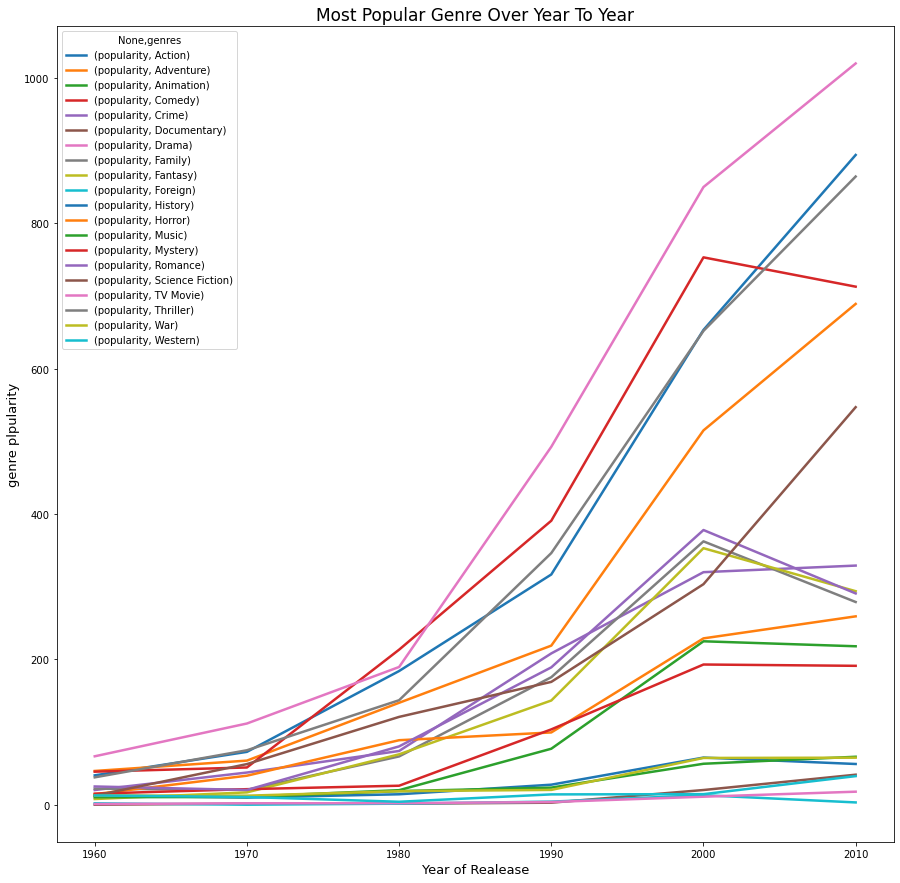

In [19]:
df_gen_clean.unstack().plot(figsize=(15,15),linewidth=2.5);   
plt.title("Most Popular Genre Over Year To Year",fontsize=17);
plt.ylabel("genre plpularity",fontsize=13);
plt.xlabel("Year of Realease",fontsize=13);

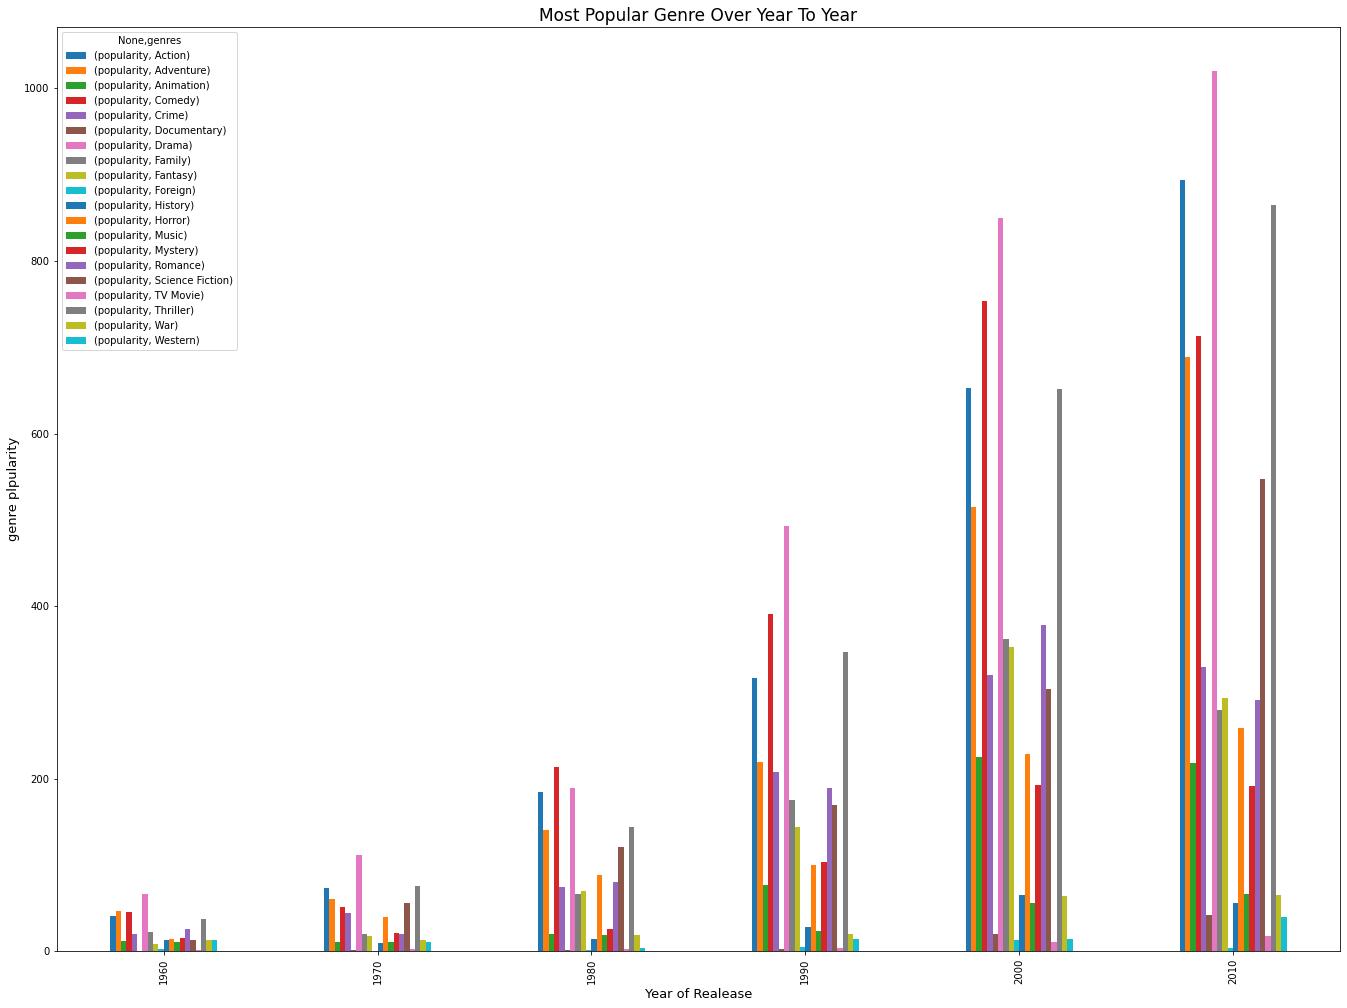

In [20]:
# function to plot data
def plot_data(data,k,title,x,y,f):
    data.plot(kind=k ,figsize=f); 
    plt.title(title,fontsize=17);
    plt.xlabel(x,fontsize=13);
    plt.ylabel(y,fontsize=13);
    
plot_data(df_gen_clean.unstack(),'bar',"Most Popular Genre Over Year To Year"\
                              ,"Year of Realease","genre plpularity",(23,17))    


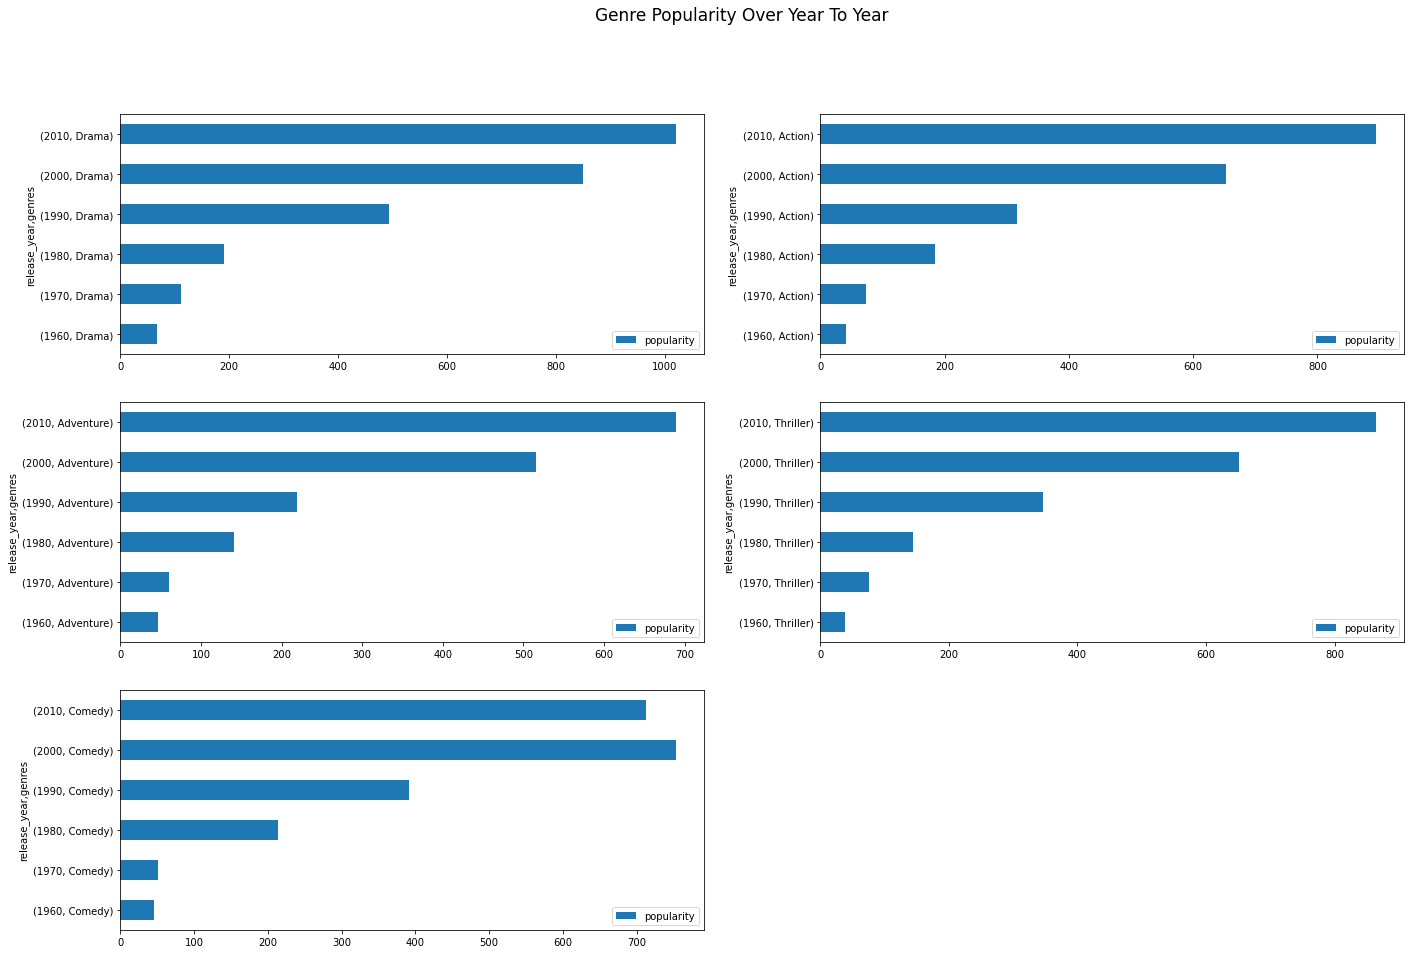

In [21]:
fig, ax = plt.subplots(3,2,figsize = (23,15))
ax[2][1].set_visible(False)

df_gen_clean.query("genres == 'Drama'").plot(kind='barh',label ="Drama",ax = ax[0][0]);
df_gen_clean.query("genres == 'Action'").plot(kind='barh',label ="Action",ax = ax[0][1]);
df_gen_clean.query("genres == 'Adventure'").plot(kind='barh',label ="Adventure",ax = ax[1][0]);
df_gen_clean.query("genres == 'Thriller'").plot(kind='barh',label ="Thriller",ax = ax[1][1]);
df_gen_clean.query("genres == 'Comedy'").plot(kind='barh',label ="Comedy",ax = ax[2][0]);



fig.suptitle('Genre Popularity Over Year To Year',fontsize = 17);


- Drama has the highest popularity among genres over time but fell befind alittle in 80's
- top popular genres:
    * Drama
    * Action
    * Thriller
    * Adventure
    * Comedy
    

###  Question 2 ( Which Genre Has The Highest Release Of Movies ?)

,genres
Drama,4362
Comedy,3429
Thriller,2744
Action,2234
Romance,1568
Horror,1521
Adventure,1383
Crime,1299
Science Fiction,1135
Family,1094


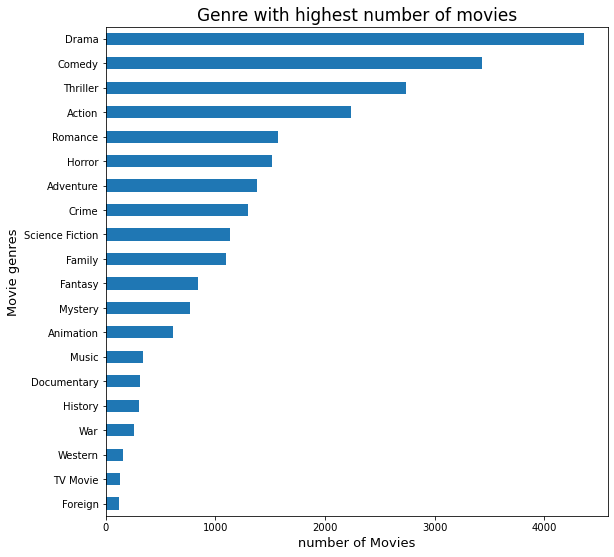

In [22]:
plot_data(df_gen.genres.value_counts().sort_values(),'barh',"Genre with highest number of movies"\
                ,"number of Movies","Movie genres",(9,9))

pd.DataFrame(df_gen['genres'].value_counts())
                              

`Drama` has the highest release of Movies with 2285 movie 
followed by:
* comedy 
* Thriller
* Action 

###  Question 3  (Which movie has the highest profit ?)

In [23]:
df_pro = df_tmbd.copy()   # make copy of original data
 
# create profit column and adding it to data
df_pro['profit'] = df_pro['revenue'] - df_pro['budget']
df_pro = df_pro.set_index('profit', append=True).sort_index(level=1,ascending=False).reset_index(level=1)
df_pro.head()

,profit,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,2544505847,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009
3,1868178225,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5231,1645034188,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997
0,1363528810,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
4,1316249360,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


,profit
count,1.000000e+01
mean,1.457341e+09
std,4.552045e+08
min,1.084280e+09
25%,1.144481e+09
50%,1.307904e+09
75%,1.574658e+09
max,2.544506e+09


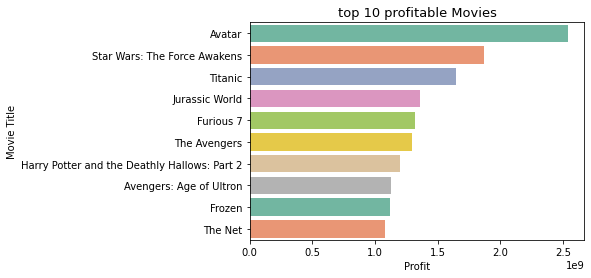

In [24]:
  # get top 10 profitable Movies
df_pro_10 = df_pro.head(10);

ax =  sns.barplot(x="profit", y="original_title",data=df_pro_10, palette="Set2");
ax.set_title("top 10 profitable Movies",fontsize = 13);
ax.set_xlabel("Profit",fontsize = 10);
ax.set_ylabel("Movie Title",fontsize = 10);

pd.DataFrame(df_pro_10['profit'].describe())

`Avatar` is the most profitable Movie followed by `star wars` & `Titanic`

###  Question 4  (Which movie genre has the highest Budget ?)

for this questions we choose the movies with nonzero budgets to get clearer results

,budget
genres,
Animation,6.332642e+07
Adventure,6.177278e+07
Fantasy,6.014405e+07
Family,5.638677e+07
Action,4.740669e+07
Science Fiction,4.456227e+07
Western,4.230713e+07
War,3.660398e+07
History,3.451502e+07


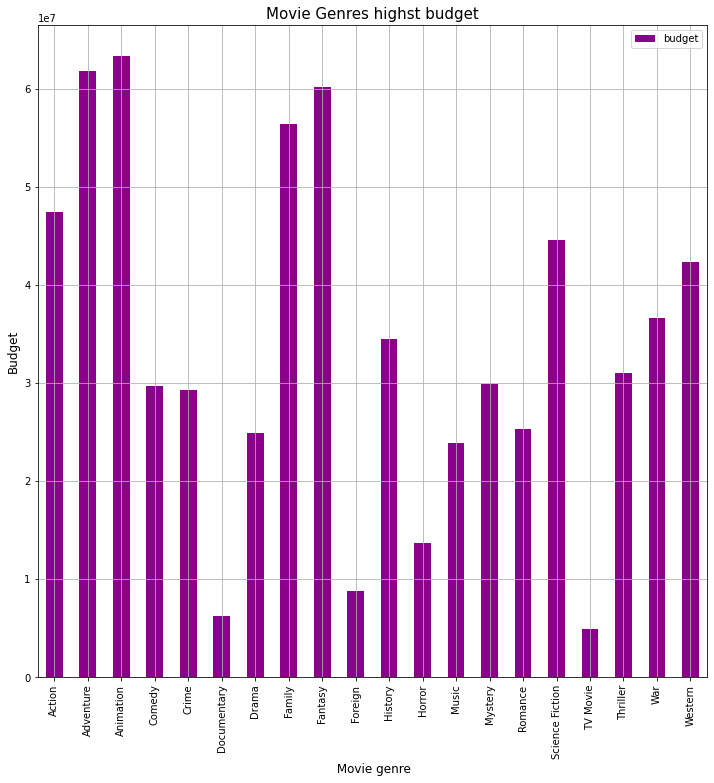

In [25]:
 # group by average budget for each genre 

df_new = df_gen.query('budget > 0 ')
df_new1 = pd.DataFrame(df_new.groupby('genres')['budget'].mean())



df_new1.plot(kind='bar', figsize =(12,12),color ="#8B008B");
plt.title("Movie Genres highst budget", fontsize=15);
plt.xlabel(" Movie genre",fontsize=12);
plt.ylabel("Budget",fontsize=12);
plt.grid(True)

pd.DataFrame(df_new1.sort_values(by='budget',ascending=False))

* from the plot it appers that `Animation ` has the highest budget
- * 1-Animation
  * 2-Adventure
  * 3-Fantasy
  * 4-Family
  * 5-Action
  * 6-Science fiction

###  Question 5  (Is a Movie's rating gets Higher with less runtime ?)

 take a look at vote_average & popularity to get the best rating distribation

,popularity
count,9759.000000
mean,0.695266
std,1.037370
min,0.000188
25%,0.232931
50%,0.420185
75%,0.777162
max,32.985763


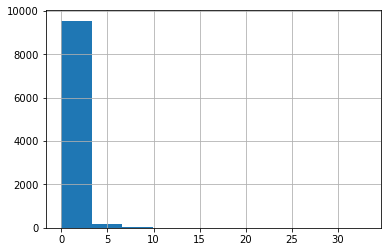

In [26]:
y = df_tmbd['popularity']
y.hist()
pd.DataFrame(y.describe())

right Skewed difficult distribuation to handle

,vote_average
count,9759.000000
mean,5.964535
std,0.912967
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,8.700000


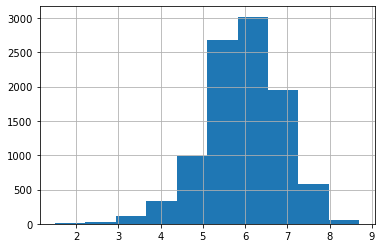

In [27]:
x =df_tmbd['vote_average']
x.hist()
pd.DataFrame(x.describe())

Left Skewed but close to normal distribuation so we will consider it as rating.

now lets look at runtime distribuation

Average runtime :   103.06373603852853


,runtime
count,9759.000000
mean,103.063736
std,27.641529
min,3.000000
25%,91.000000
50%,100.000000
75%,112.000000
max,877.000000


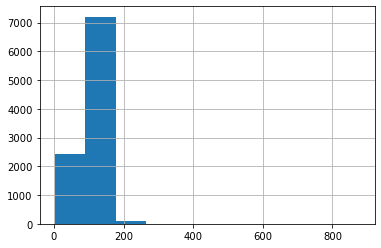

In [28]:
z =df_tmbd['runtime']
print( "Average runtime :  " ,z.mean())
z.hist();
pd.DataFrame(z.describe())

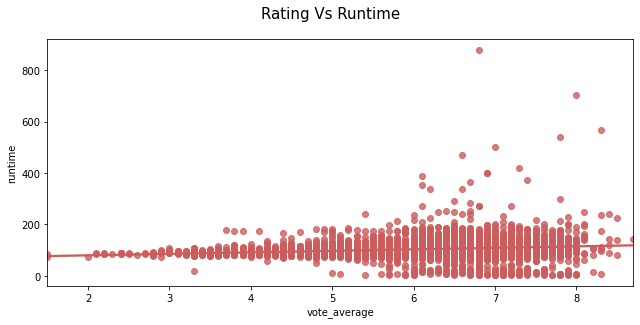

In [29]:
fig, ax = plt.subplots(figsize = (10.5,4.55))

fig.suptitle("Rating Vs Runtime",fontsize=15);
sns.regplot(x=df_tmbd['vote_average'], y=df_tmbd['runtime'], color="#CD5C5C");

sns.axes_style("whitegrid");

There ia a positive correlation between `vote_average` & `Runtime` but its relatively weak 

  so we can not determine that runtime affect rating of a movie


###  Question 6  (Which year has the highest release of movies? )

,id
release_year,
2014,633
2013,564
2015,554
2012,497
2009,474
2011,455
2008,440
2010,420
2007,389


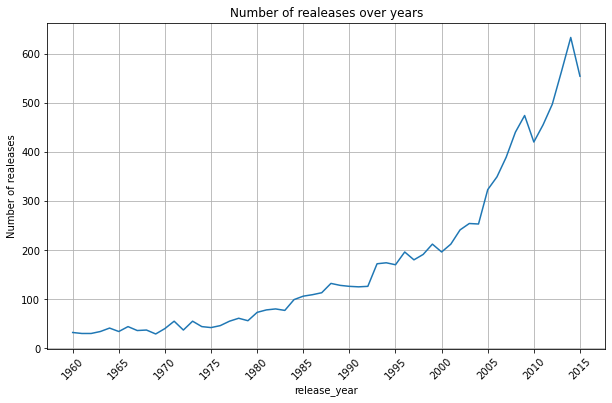

In [30]:
y1 = df_tmbd.groupby('release_year').count()['id'].sort_values(ascending=False)
                # higher number of releases in year 
     # group by number of movies released every year

df_tmbd.groupby('release_year').count()['id'].plot(figsize=(10,6),xticks = np.arange(1960,2016,5));

plt.grid(True);
plt.title("Number of realeases over years");
plt.ylabel("Number of realeases");
plt.xticks(rotation=45);

pd.DataFrame(y1).head(10)

- the highset number of released movies is in year <b>2014<b/> 
- also the movies has increased over time specially between   <b>2007 & 2014 <b/>
    - but droped alittle by year <b>2009<b/> compaared to other years in this period

###  Question 7   (Most Frequent Actor ?)

In [31]:
# function to split and count values 
def split_df_count(col):

    df_col = df_tmbd[col].str.cat(sep = '|')
    data = pd.Series(df_col.split('|'))
    # count col values and returm them 
    col_count = data.value_counts(ascending=False)
    return col_count



c1 = pd.DataFrame(split_df_count('cast').reset_index())
c1.rename(mapper={'index':'actor',0:'number_of_movies'},axis=1,inplace=True)

c1.head(10)

,actor,number_of_movies
0,Robert De Niro,72
1,Samuel L. Jackson,70
2,Bruce Willis,62
3,Nicolas Cage,61
4,Michael Caine,52
5,Robin Williams,51
6,Morgan Freeman,49
7,John Goodman,48
8,John Cusack,48
9,Alec Baldwin,47


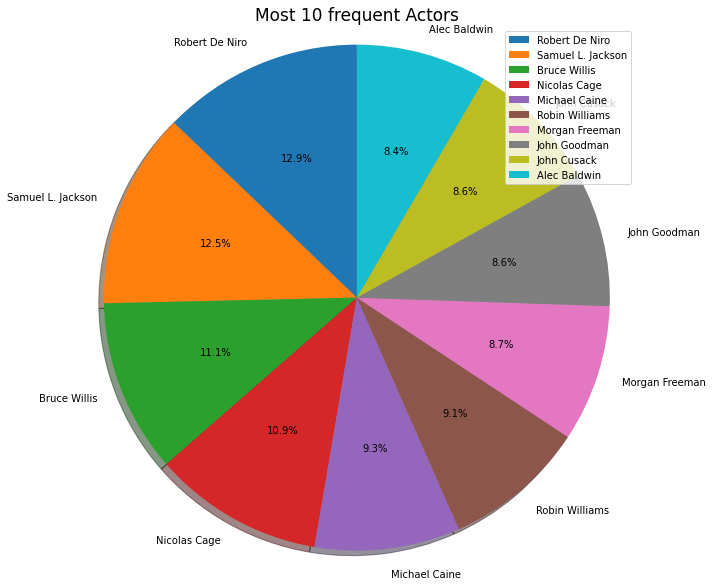

In [32]:
labels = c1.actor.iloc[:10]    #select top 10 common actor
sizes = c1.number_of_movies.iloc[:10]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels,\
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend()
  
    
plt.title('Most 10 frequent Actors',fontsize=17)
plt.axis('equal')

plt.show()

 <b>Robert De Niro<b/>   is the most frequent actor who played in many movies  
    
 - followed by:                
   * Samuel L. Jackson   
   * Bruce Willis
   * Nicolas Cage 
    

###  Question 8  (Top 10 Production Companies With Higher Number Of Release ?)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64


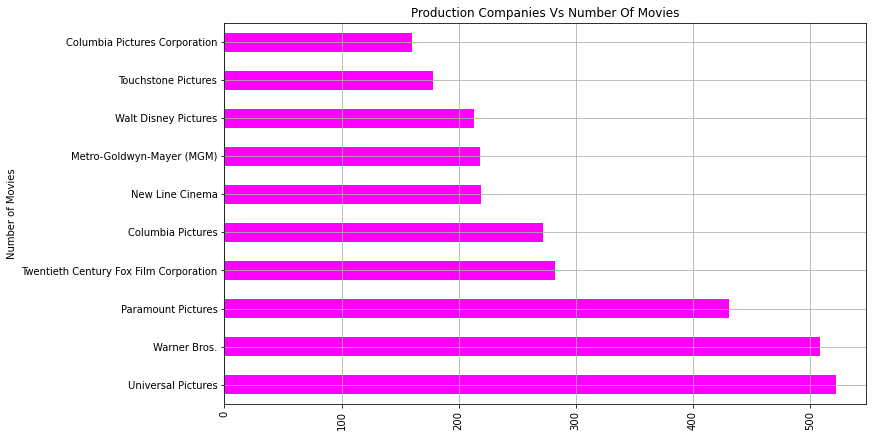

In [33]:
df_prod = split_df_count('production_companies')
print(df_prod.head(10))

df_prod.iloc[:10].plot(kind='barh',figsize=(11.5,7),color='magenta');

plt.grid(True);
plt.title("Production Companies Vs Number Of Movies");
plt.ylabel("Number of Movies");
plt.xticks(rotation=90);

plt.show();

<b> Universal Pictures  </b> released a huge number of movies 360 in 1960 to 2015 according to data

###  Question 9  (movie Rating dependency on profit?)

 
 * Due to the distribuation it is better to use `vote_Average ` than using `popularity` to avoid trouble with this right skewed and also get rating on a specified scale from 1 to 10 
 

correlation =  0.20142881450580663


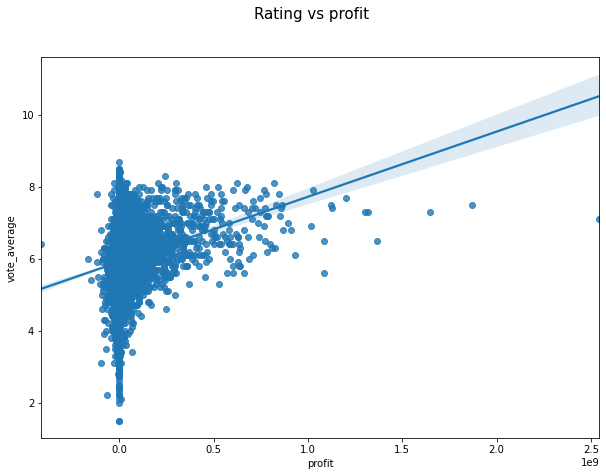

In [34]:
 fig, axes = plt.subplots(figsize = (10,7))

fig.suptitle("Rating vs profit",fontsize=15)
sns.regplot(x=df_pro['profit'], y=df_pro['vote_average']);

print('correlation = ',df_pro.corr().loc['vote_average','profit'])

<b>Rating & profit : </b>

 the regression plot shows  weak positive correlation (0.26) so it is not necessary that higher rating gets higher profit

###  Question 10  (What kinds of properties are associated with movies that have high revenues ?)

In [35]:
df_rev = df_tmbd.set_index('revenue', append=True).sort_index(level=1,ascending=False).reset_index(level=1)
df_rev.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,2781505847,19995,9.432768,237000000,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009
3,2068178225,140607,11.173104,200000000,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5231,1845034188,597,4.355219,200000000,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997


<AxesSubplot:>

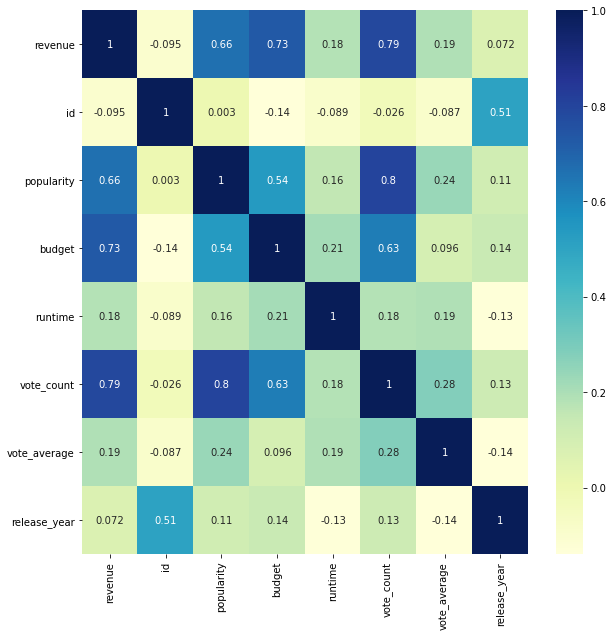

In [36]:
plt.figure(figsize=(10,10))    # correlation matrix
sns.heatmap(df_rev.corr(method='pearson', min_periods=1),annot=True ,cmap="YlGnBu")

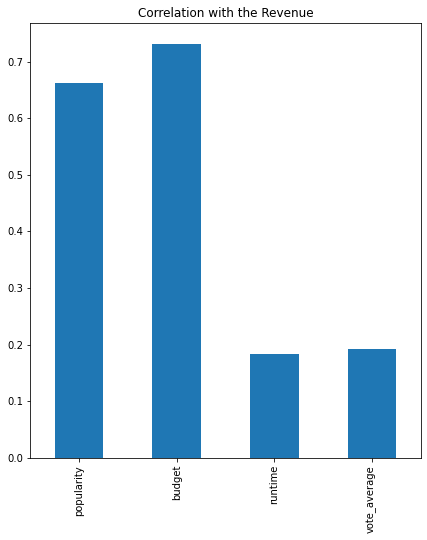

In [37]:
X = df_rev.drop(['vote_count','revenue','id','release_year'] , axis=1)
y = df_rev['revenue']
X.corrwith(y).plot(kind='bar', grid=False, figsize=(7, 8), title="Correlation with the Revenue");

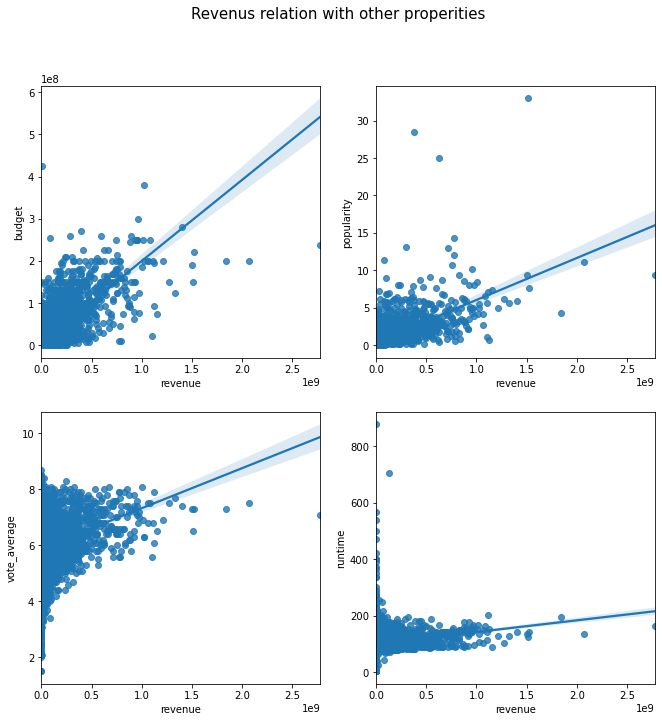

In [38]:
fig, axes = plt.subplots(2,2,figsize = (11,11))

fig.suptitle("Revenus relation with other properities",fontsize=15);
sns.regplot(x=df_rev['revenue'], y=df_rev['budget'],ax=axes[0][0]);
sns.regplot(x=df_rev['revenue'], y=df_rev['popularity'],ax=axes[0][1]);
sns.regplot(x=df_rev['revenue'], y=df_rev['vote_average'],ax=axes[1][0]);
sns.regplot(x=df_rev['revenue'], y=df_rev['runtime'],ax=axes[1][1]);


* <b>Plot 1 (Revenue vs budegt) :</b>

    has strong positive correlation (0.7) so there may be a possibility that the more investement are made you can get more revenues 
    
* <b>Plot 2 (Revenue vs popularity) :</b>    

   has strong positive correlation (0.64) in some cases that popularity may help increase revenues
   
* <b>Plot 3 (Revenue vs vote_average) :</b>    

   has a very weak positive correlation (0.25) it proves there is hardly any relation with revenue
   
* <b>Plot 4 (Revenue vs runtime) :</b>    

   has a very weak positive correlation (0.23) it proves there is hardly any relation with revenue
   

<a id='conclusions'></a>
## Conclusions

* Drama is the most popular genre, following by action , popularity grows over time.
* Drama has the highest release of Movies with 2285 movie , Comedy (1692).
* Avatar is the most profitable Movie followed by star wars & Titanic.
* Animation has the highest budget , then Adventure & fantasy.
* we can not determine that runtime affect rating of a movie (weak relation).
* the highset number of released movies is in year 2011 ,but droped alittle by year 2009 .
* Robert De Niro is the most frequent actor who played in many movies.
* Universal Pictures released a huge number of movies 360 in 1960 to 2015 according to data.
* it is not necessary that higher rating gets higher profit.
* a possibility that the more investement are made you can get more revenues
* popularity may help increase revenues
* no relation between rating and runtime with revenue.







### limtations:

*  it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
* this is not a high effective solution as a huge sample of the data has manu flows speciffically zero budget movies but it shows good results
* it takes longer time to work due to removing `|` from some columns and splitting  them to multiple rows